In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

## Objectives
In this narrative, we are going to explore the products available in Redmart (an online ecommerce grocery/retail store) and hope to answer these questions:
1. What is the Min/Max/Mean and price distribution of all the products?
2. Does country of origin affect the price of the products?
3. How useful are the product description?
4. What are some of the common brands and manufacturers?
5. Is Redmart a good place for Organic food lovers?
6. How many products are stock out?

In [1]:
# from src.data import make_dataset

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
import numpy as np
import pandas as pd
from glob import glob
from IPython.display import Image, display, HTML
import os

# Importing data from ./data/processed
# For information on how data is gathered, use "make download-data" and "make data"
os.chdir(os.path.dirname(os.getcwd()) + '/data/processed')
dataFile = os.getcwd() + '/data.csv'
basePdtURL = 'https://redmart.com/product/'
df = pd.read_csv(dataFile, names = ['pdtID', 'pdtName', 'pdtDesc', 'pdtImageURL', 'pdtPrice', 'pdtCountryOfOrigin', 'pdtOrganic', 'pdtMfgName', 'pdtBrandName', 'pdtStockStatus', 'pdtURI', 'pdtCategoryTags'])

pdtPriceMax = df.loc[df['pdtPrice'] == df['pdtPrice'].max(), ['pdtName']]
print('The most expensive product is', pdtPriceMax.values[0][0], 'and will cost you $', df['pdtPrice'].max())
pdtPriceMean = df['pdtPrice'].mean()
print('The average price of the product is $', round(float(pdtPriceMean), 2) )
pdtPriceMin = df.loc[df['pdtPrice'] == df['pdtPrice'].min(), ['pdtName', 'pdtURI']]
print('We also found that the lowest priced product', pdtPriceMin.values[0][0], 'costs only $', df['pdtPrice'].min(), '. See it for yourself here -', basePdtURL + str(pdtPriceMin.values[0][1]) )

The most expensive product is Yamazaki 25 Years Old Whisky 700 ML and will cost you $ 6599.9
The average price of the product is $ 26.76
We also found that the lowest priced product Twinings Tea Plunger costs only $ 0.0 . See it for yourself here - https://redmart.com/product/twinings-tea-plunger-99900547


In [3]:
df

,pdtID,pdtName,pdtDesc,pdtImageURL,pdtPrice,pdtCountryOfOrigin,pdtOrganic,pdtMfgName,pdtBrandName,pdtStockStatus,pdtURI,pdtCategoryTags
0,101402,RedMart Hot Cross Buns 4's,4 White fruited hot cross buns. Packed with pl...,https://s3-ap-southeast-1.amazonaws.com/media....,3.95,Singapore,0.0,Commonwealth Culinary Cretions Pte Ltd,RedMart,1.0,redmart-hot-cross-buns-4s-101402,"['bakery', 'cakes-sweet-pies', 'muffins-cookie..."
1,55665,RedMart Sesame Bagel 4's - Frozen,"Ring shaped bread, dense, chewy, doughy interi...",https://s3-ap-southeast-1.amazonaws.com/media....,5.95,Singapore,0.0,Commonwealth Cretions Pte Ltd,RedMart,1.0,redmart-frozen-sesame-bagel-5s-55665,"['bakery', 'breakfast-treats-212', 'bagels-pre..."
2,55659,RedMart Multigrain Bread Sliced,A mix of grains in one healthy bread loaf.,https://s3-ap-southeast-1.amazonaws.com/media....,5.50,Singapore,0.0,Commonwealth Cretions Pte Ltd,RedMart,1.0,redmart-multigrain-bread-sliced-55659,"['bakery', 'bakery-bread', 'loaves-artisanal-b..."
3,55664,RedMart Plain Bagel 4's - Frozen,"Ring shaped bread, dense, chewy, doughy interior.",https://s3-ap-southeast-1.amazonaws.com/media....,5.95,Singapore,0.0,Commonwealth Cretions Pte Ltd,RedMart,1.0,redmart-frozen-plain-bagel-5s-55664,"['frozen', 'pastry-cakes-bread', 'breakfast-tr..."
4,55667,RedMart Whole Wheat Bagel 4's - Frozen,"Ring shaped bread, dense, chewy, doughy interi...",https://s3-ap-southeast-1.amazonaws.com/media....,5.95,Singapore,0.0,Commonwealth Cretions Pte Ltd,RedMart,1.0,redmart-frozen-whole-wheat-bagel-5s-55667,"['frozen', 'pastry-cakes-bread', 'breakfast-tr..."
5,55666,RedMart Cinnamon Raisin Bagel 4's - Frozen,"Ring shaped bread, dense, chewy, doughy interi...",https://s3-ap-southeast-1.amazonaws.com/media....,5.95,Singapore,0.0,Commonwealth Cretions Pte Ltd,RedMart,1.0,redmart-frozen-cinnamon-raisin-bagel-5s-55666,"['frozen', 'pastry-cakes-bread', 'breakfast-tr..."
6,44205,RedMart Freshly Made Wholemeal Wraps,Healthy Wholemeal Wraps made of fresh locally ...,https://s3-ap-southeast-1.amazonaws.com/media....,4.95,Singapore,0.0,Gourmet Ready,RedMart,1.0,redmart-freshly-made-wholemeal-wraps-44205,"['bakery', 'wraps-pita-indian-breads', 'wraps'..."
7,55662,RedMart Swiss Country Bread,Mixed grain bread with half white flour and di...,https://s3-ap-southeast-1.amazonaws.com/media....,6.75,Singapore,0.0,Commonwealth Cretions Pte Ltd,RedMart,1.0,redmart-swiss-country-bread-55662,"['bakery', 'bakery-bread', 'loaves-artisanal-b..."
8,55661,RedMart German Multigrain Roll 6's,A mix of grains in every roll.,https://s3-ap-southeast-1.amazonaws.com/media....,6.45,Singapore,0.0,Commonwealth Cretions Pte Ltd,RedMart,1.0,redmart-german-multigrain-roll-6s-55661,"['bakery', 'bakery-bread', 'loaves-artisanal-b..."
9,55654,RedMart Sesame Hamburger Buns 4's,"Soft, slightly sweet and golden-yellow from th...",https://s3-ap-southeast-1.amazonaws.com/media....,4.80,Singapore,0.0,Commonwealth Cretions Pte Ltd,RedMart,1.0,redmart-sesame-hamburger-buns-4s-55654,"['bakery', 'rolls-buns-212', 'buns', 'bakery-b..."


In [4]:
df.describe()

,pdtID,pdtPrice,pdtOrganic,pdtStockStatus
count,5.958800e+04,59588.000000,58801.000000,59588.000000
mean,1.218733e+05,26.763607,0.027023,0.933963
std,1.220746e+06,64.292689,0.162153,0.248348
min,4.198000e+03,0.000000,0.000000,0.000000
25%,5.678150e+04,5.250000,0.000000,1.000000
50%,1.096545e+05,11.500000,0.000000,1.000000
75%,1.495982e+05,27.900000,0.000000,1.000000
max,9.990055e+07,6599.900000,1.000000,1.000000


In [5]:
print('In the table below, let\'s look at the breakdown on where the items are originated from ')
pdtFreq = pd.value_counts(df.pdtCountryOfOrigin).to_frame().reset_index()
pdtFreq.columns = ['Country_of_Origin', 'Number_of_Items']
pdtFreq.head(10)

In the table below, let's look at the breakdown on where the items are originated from 


,Country_of_Origin,Number_of_Items
0,China,9274
1,United States,8184
2,Singapore,5424
3,United Kingdom,3914
4,Australia,3491
5,Japan,3457
6,Malaysia,3337
7,France,2597
8,Thailand,2429
9,South Korea,2133


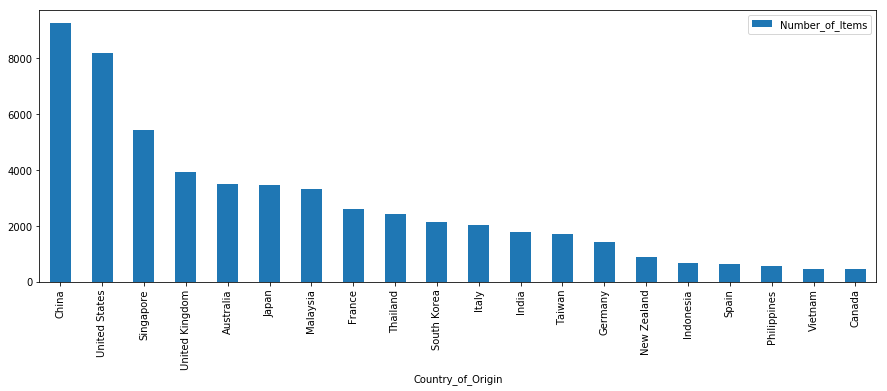

In [6]:
pdtFreq = pdtFreq.head(20)
pdtFreq.set_index("Country_of_Origin",drop=True,inplace=True)
pdtFreq.plot(kind='bar')

# Products
Let's look at some problems we randomly display from the entire list of products extracted

In [7]:
print("Total number of products:", len(df.index))

IMAGE_URL = 'https://s3-ap-southeast-1.amazonaws.com/media.redmart.com/newmedia/150x'

from random import shuffle
imageURLs = df['pdtImageURL'].tolist()
shuffle(imageURLs)

imagesList=''.join( ["<img style='width: 100px; margin: 0px; float: left; border: 1px solid black;' src='%s' />" % str(s) for s in imageURLs[:42] ] )
display(HTML(imagesList))

Total number of products: 59588


In [8]:
pdtCountryPrice = df[['pdtCountryOfOrigin', 'pdtPrice']]
pdtCountryPrice.groupby('pdtCountryOfOrigin')['pdtPrice'].count()
# pdtCountryPrice
# countryCount = len(pdtCountryPrice.pdtCountryOfOrigin.unique())

pdtCountryOfOrigin
Argentina                                 75
Australia                               3491
Austria                                  178
Azerbaijan                                 8
Bangladesh                                15
Barbados                                   4
Belgium                                  266
Belize                                     2
Bermuda                                    3
Bolivia                                   11
Bosnia and Herzegovina                     2
Brazil                                   132
British Indian Ocean Territory             1
Bulgaria                                  18
Cambodia                                   9
Cameroon                                   2
Canada                                   445
Caribbean Netherlands                      4
Chile                                    125
China                                   9274
Colombia                                  20
Croatia                             

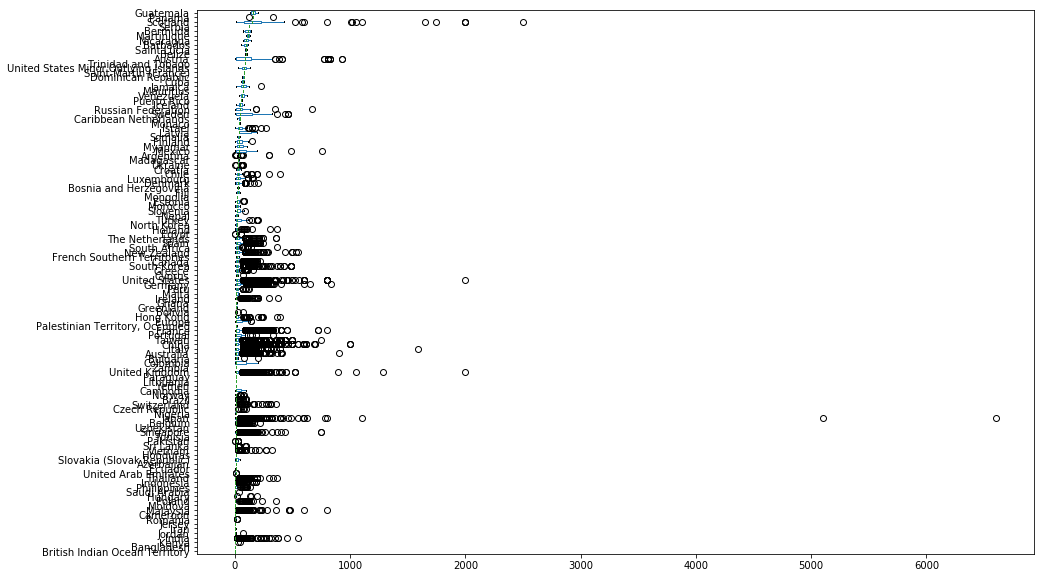

In [9]:
pdtCountryPrice = pdtCountryPrice.pivot(columns=pdtCountryPrice.columns[0], index=pdtCountryPrice.index)
pdtCountryPrice.columns = pdtCountryPrice.columns.droplevel()
med = pdtCountryPrice.median()
med = med.sort_values() # ascending=False
pdtCountryPrice = pdtCountryPrice[med.index]
pdtCountryPrice.plot(kind='box', figsize=(15,10), vert=False) # rot=90, 